#Visualisation of pre-pilot data 

Thirteenparticipants up to the 8th of June.



##Data formating

Loading of data
Formating of variable types

In [79]:
# Python packages 
import numpy as np
import pandas as pd
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.anova import *


In [80]:
# Data set loading
df_url = "https://raw.githubusercontent.com/tracysanchez/Idea/master/LongAverageAvatars-%20Sheet4.csv?token=ARKBDJRFIA2R7OISPFNGHQ3A2BLQ6"
df = pd.read_csv(df_url, header=1)
df.head()


,ID,Score,Category,Clarity
0,1,3.866667,Bakery Clarity,True
1,1,4.266667,Bakery Support,False
2,2,4.666667,Furniture Support,False
3,2,4.400000,Furniture Clarity,True
4,3,4.933333,Maraz Coffer Support,False


In [81]:
#Initial exploration of the data set 
df["Category"].astype("category")
df.info()

#Adding labels to Clarity variable 
df.loc[:, "str_category"] = df["Clarity"].replace({True: "Clarity", False: "Support"})



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        52 non-null     int64  
 1   Score     52 non-null     float64
 2   Category  52 non-null     object 
 3   Clarity   52 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 1.4+ KB


In [82]:
# WideData loading
df_urlw = "https://raw.githubusercontent.com/tracysanchez/Idea/master/WideFormat.csv?token=ARKBDJVH2T7T6HFOIB2WZ6TA2B7XW"
dfw = pd.read_csv(df_urlw)
dfw.tail(6)


,Bakery Clarity,Bakery Support,Furniture Support,Furniture Clarity,Maraz Coffer Support,Maraz Coffee Clarity,Pizzeria Support,Pizzeria Clarity,Patisserie Support,Patisserie Clarity,Clothing Store Support,Clothing Store Clarity,A_Table Clarity,A_Table Support,Pub Clarity,Pub Support,Sandwich Clarity,Sandwich Support,Roasterie Clarity,Roasterie Support,Sushi Support,Sushi Clarity,Donuts Support,Donuts Clarity,Strechnits Support,Strechnits Clarity,Lotto Clarity,Lotto Support,FishChips Support,FishChips Clarity,Bicycle Support,Bicycle Clarity,Book Clarity,Book Support,Shisha Clarity,Shisha Support,Tool store Clarity,Tool Store Support,Green Store Support,Green Store Clarity,Car shop Support,Car shop Clarity,Grocery store Clarity,Grocery store Support,Wine Support,Wine Clarity,La_Cantine Support,La_Cantine Clarity,Basketball Clarity,Basketball Support,Construction_Worker Support,Construction_Worker Clarity
9,4,4,4,3,5,4,4,2,4,3,4,2,4,4,4,4,2,2,2,1,4,3,1,2,4,3,4,4,2,1,5,5,4,4,4,5,4,4,4,4,5,5,1,1,4,4,4,4,5,5,5,5
10,5,4,5,5,5,5,5,5,5,5,5,5,3,3,5,5,5,5,5,5,5,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
11,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,5,5,4,5,5,5,4,5,5,5,5,3,3,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
12,4,4,5,4,5,5,4,5,3,4,2,2,3,4,4,4,3,3,4,4,3,3,4,4,3,4,3,3,1,1,5,4,5,5,3,3,3,3,4,3,5,5,4,3,4,4,5,5,5,5,5,5
13,4,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5,4,5,5,5,5,5,2,2,5,5,5,5,5,5,5,5
14,3,2,3,2,4,3,5,5,4,3,4,4,5,5,3,3,3,3,4,4,4,4,4,3,4,4,5,5,5,5,4,4,4,4,4,4,3,4,4,3,5,5,4,4,5,4,4,4,3,4,5,5


In [83]:
#Wide to long format 

melted = dfw.melt(var_name="Category", value_name="Likert_Score")
melted.head()

,Category,Likert_Score
0,Bakery Clarity,4
1,Bakery Clarity,3
2,Bakery Clarity,4
3,Bakery Clarity,4
4,Bakery Clarity,2


In [84]:
#Creating Clarity Categorical variable 
melted["Clarity"] = melted["Category"].str.contains("Clarity")
melted.loc[:, "Clarity_category"] = melted["Clarity"].replace({True: "Clarity", False: "Support"})

melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Category          780 non-null    object
 1   Likert_Score      780 non-null    int64 
 2   Clarity           780 non-null    bool  
 3   Clarity_category  780 non-null    object
dtypes: bool(1), int64(1), object(2)
memory usage: 19.2+ KB


In [85]:
#List of values for iteration search 

ListShops = ["Basketball","Bakery", "Construction_Worker", "La_Cantine", "Wine", "Furniture", "Maraz", "Pizzeria","Patisserie",
             "Clothing", "A_Table", "Pub", "Sandwich", "Roasterie", "Sushi", "Donuts", "Strechnits", "Lotto", "FishChips", "Bicycle", "Book", "Shisha", "Tool", "Green", "Car", "Grocery"]

#Searching for a partial string "ListShops" in variable "Category" to creat a new variable "Shops"

for idx, row in melted.iterrows():
    for l in ListShops:
        if l in row['Category']:
            melted.loc[idx, 'Shops'] = l

melted.head()



,Category,Likert_Score,Clarity,Clarity_category,Shops
0,Bakery Clarity,4,True,Clarity,Bakery
1,Bakery Clarity,3,True,Clarity,Bakery
2,Bakery Clarity,4,True,Clarity,Bakery
3,Bakery Clarity,4,True,Clarity,Bakery
4,Bakery Clarity,2,True,Clarity,Bakery


In [86]:
melted.Shops.value_counts()

Shisha                 30
A_Table                30
Furniture              30
Green                  30
Patisserie             30
Grocery                30
Pub                    30
Bakery                 30
Lotto                  30
Strechnits             30
Sushi                  30
Construction_Worker    30
Bicycle                30
Clothing               30
La_Cantine             30
Tool                   30
Wine                   30
Basketball             30
Car                    30
Roasterie              30
Book                   30
FishChips              30
Sandwich               30
Maraz                  30
Pizzeria               30
Donuts                 30
Name: Shops, dtype: int64

##Descriptives  

Mean, quartiles and Standard Deviation of scores of Clarity of avatars actions and Support of the meaning of the location

- Is the action of the Avatar in the scene clear?
- Is the action of the Avatar supporting the meaning of the location?



In [97]:
#Average values Support and clarity 
melted.groupby("Clarity_category")["Likert_Score"].describe()

,count,mean,std,min,25%,50%,75%,max
Clarity_category,,,,,,,,
Clarity,390.0,4.271795,1.125984,1.0,4.0,5.0,5.0,5.0
Support,390.0,4.415385,1.009858,1.0,4.0,5.0,5.0,5.0


In [95]:
melted.pivot_table("Likert_Score", "Shops").sort_values(by="Likert_Score")

,Likert_Score
Shops,
FishChips,3.100000
Lotto,3.700000
Grocery,3.766667
Sandwich,3.833333
Roasterie,3.933333
Sushi,3.966667
Tool,4.033333
Donuts,4.033333
A_Table,4.066667


In [94]:
#Average values Support and clarity 
melted.groupby("Category")["Likert_Score"].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
A_Table Clarity,15.0,3.933333,1.222799,1.0,3.0,4.0,5.0,5.0
A_Table Support,15.0,4.200000,1.014185,2.0,3.5,5.0,5.0,5.0
Bakery Clarity,15.0,3.866667,0.833809,2.0,3.5,4.0,4.0,5.0
Bakery Support,15.0,4.266667,0.798809,2.0,4.0,4.0,5.0,5.0
Basketball Clarity,15.0,4.666667,0.723747,3.0,5.0,5.0,5.0,5.0
Basketball Support,15.0,4.800000,0.560612,3.0,5.0,5.0,5.0,5.0
Bicycle Clarity,15.0,4.866667,0.351866,4.0,5.0,5.0,5.0,5.0
Bicycle Support,15.0,4.933333,0.258199,4.0,5.0,5.0,5.0,5.0
Book Clarity,15.0,4.866667,0.351866,4.0,5.0,5.0,5.0,5.0


##Data visualization

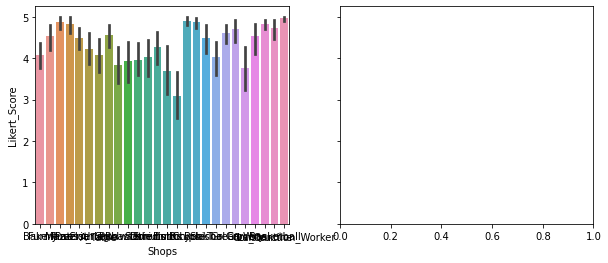

In [105]:
#create figure and axes objects of a predefined size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharey=True)

# create barplots
sns.barplot(data= melted, x="Shops", y="Likert_Score",  ax=axes[0])

plt.show()



